In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [6]:
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

In [7]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
#data.info()

In [ ]:
#data.describe()

In [7]:
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
data['Income'] = data['Income'].fillna(data['Income'].mean())


In [9]:
data.corr(numeric_only=True)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,...,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,NaN,NaN,0.132756
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


<Axes: >

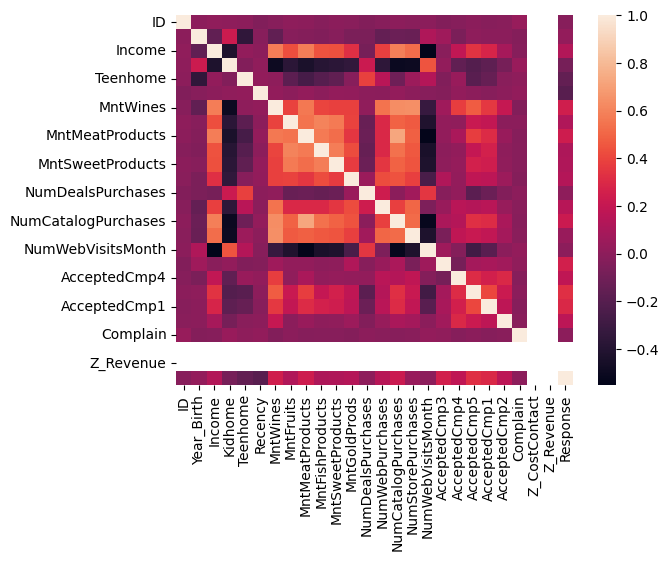

In [10]:
sns.heatmap(data.corr(numeric_only=True))

###2. Data Preprocessing

encoding

In [11]:
# One-hot encoding
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)


Normalizing the numerical Features

In [28]:
num_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'NumWebVisitsMonth']
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data[num_features])

###3. Cluster Analysis

K-Means Clustering

In [13]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

data['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
wcss = kmeans.inertia_
print(f"WCSS: {wcss}")


WCSS: 8482.754713678814


Silhouette Score

In [15]:
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.24460368354067988


###4. Cluster Interpretation

In [23]:
# using the numeric columns only
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

cluster_summary = data.groupby('Cluster')[numeric_cols].mean()

print(cluster_summary)


                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5544.774580  1965.175060  43279.935278  1.071942  1.040767   
1        5602.883683  1978.000000  30975.897428  0.831987  0.003231   
2        5570.943249  1968.465753  78163.198154  0.043053  0.011742   
3        5626.738817  1963.028860  57533.384209  0.015873  0.998557   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        49.796163  108.112710   6.081535        42.637890         8.676259   
1        48.686591   51.027464   9.651050        41.833603        14.348950   
2        49.847358  613.299413  62.841487       461.297456        90.788650   
3        48.529582  419.554113  26.399711       136.464646        36.311688   

         ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster  ...         

###4. Cluster Visualization

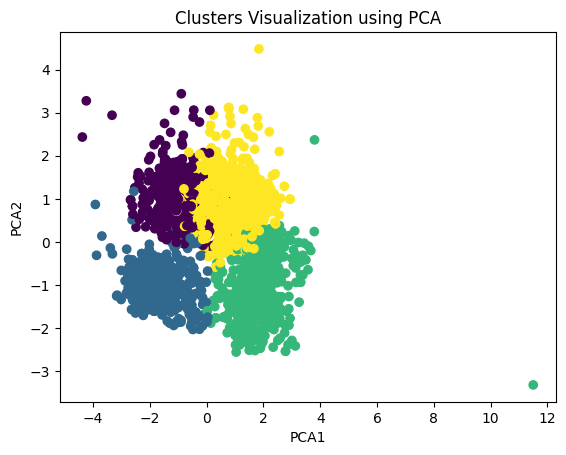

In [17]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)


plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Visualization using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


Alternativey...we could use the TSNE

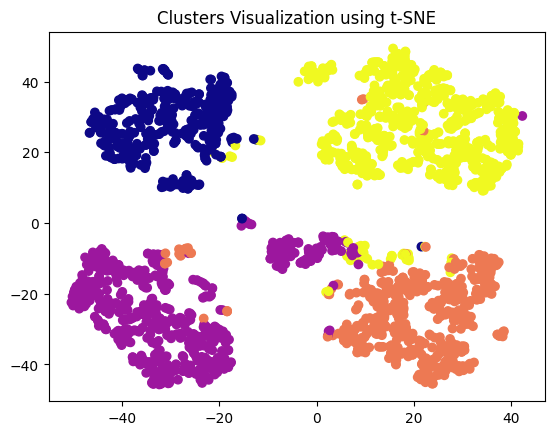

In [25]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['Cluster'], cmap='plasma')
plt.title('Clusters Visualization using t-SNE')
plt.show()


PCA or t-SNE scatter plots: They show there is clear separation between cluster, thus there is a distinct customer segments exist.